Epoch 1/100
21/58 [=========>....................] - ETA: 0s - loss: 3.1044 - accuracy: 0.7286

2022-10-05 20:00:21.906194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


58/58 [==============================] - 1s 8ms/step - loss: 2.2746 - accuracy: 0.6493 - val_loss: 1.3533 - val_accuracy: 0.5521
Epoch 2/100
11/58 [====>.........................] - ETA: 0s - loss: 1.2827 - accuracy: 0.5818

2022-10-05 20:00:22.344397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


58/58 [==============================] - 0s 6ms/step - loss: 1.1863 - accuracy: 0.5851 - val_loss: 0.9705 - val_accuracy: 0.6094
Epoch 3/100
58/58 [==============================] - 0s 6ms/step - loss: 1.0009 - accuracy: 0.5799 - val_loss: 0.9285 - val_accuracy: 0.6250
Epoch 4/100
58/58 [==============================] - 0s 6ms/step - loss: 0.9028 - accuracy: 0.5747 - val_loss: 0.9208 - val_accuracy: 0.6198
Epoch 5/100
58/58 [==============================] - 0s 6ms/step - loss: 0.8381 - accuracy: 0.6042 - val_loss: 0.8204 - val_accuracy: 0.5573
Epoch 6/100
58/58 [==============================] - 0s 7ms/step - loss: 0.7722 - accuracy: 0.6215 - val_loss: 0.8667 - val_accuracy: 0.5573
Epoch 7/100
58/58 [==============================] - 0s 7ms/step - loss: 0.7805 - accuracy: 0.6042 - val_loss: 0.7688 - val_accuracy: 0.5833
Epoch 8/100
58/58 [==============================] - 0s 6ms/step - loss: 0.7141 - accuracy: 0.6354 - val_loss: 0.7741 - val_accuracy: 0.6198
Epoch 9/100
58/58 [======

Epoch 60/100
58/58 [==============================] - 0s 6ms/step - loss: 0.5285 - accuracy: 0.7378 - val_loss: 0.6417 - val_accuracy: 0.6458
Epoch 61/100
58/58 [==============================] - 0s 6ms/step - loss: 0.5275 - accuracy: 0.7274 - val_loss: 0.6110 - val_accuracy: 0.7188
Epoch 62/100
58/58 [==============================] - 0s 6ms/step - loss: 0.5225 - accuracy: 0.7326 - val_loss: 0.6221 - val_accuracy: 0.6771
Epoch 63/100
58/58 [==============================] - 0s 6ms/step - loss: 0.5256 - accuracy: 0.7465 - val_loss: 0.6433 - val_accuracy: 0.6354
Epoch 64/100
58/58 [==============================] - 0s 6ms/step - loss: 0.5280 - accuracy: 0.7344 - val_loss: 0.6317 - val_accuracy: 0.6771
Epoch 65/100
58/58 [==============================] - 0s 6ms/step - loss: 0.5284 - accuracy: 0.7309 - val_loss: 0.6340 - val_accuracy: 0.6562
Epoch 66/100
58/58 [==============================] - 0s 6ms/step - loss: 0.5204 - accuracy: 0.7378 - val_loss: 0.6069 - val_accuracy: 0.6927
Epoch 

2022-10-05 20:00:57.867215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


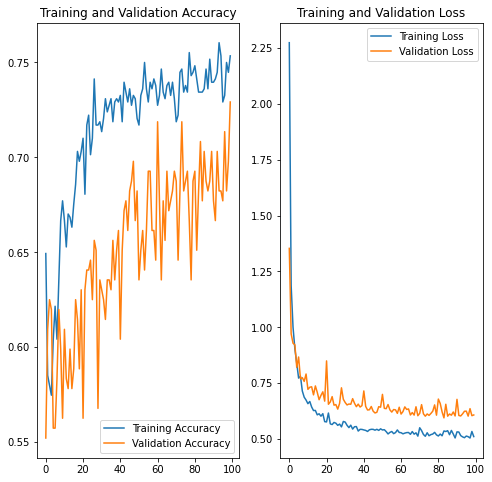

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dataset=pd.read_csv("pima-indians-diabetes.csv")

dataset=np.array(dataset)
x=dataset[:, 0:8]
y=dataset[:, 8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(x, y, epochs=100, batch_size=10, validation_split=0.25)
_, accuracy=model.evaluate(x, y)
print(accuracy)

#predictions = model.predict(x)

#predictions = (model.predict(x) > 0.5).astype(int)

acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range=range(100)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#ohe=OneHotEncoder(sparse=False)
#label_ohe=ohe.fit_transform(y)

dataset=pd.read_csv("pima-indians-diabetes.csv")

x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

y_label=pd.get_dummies(y)


#x_train, x_test, y_train, y_test = train_test_split(dataset, y_label, test_size=0.2, random_state=42)
#x_train.shape


model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history=model.fit(x, y_label, epochs=10, batch_size=10, validation_split=0.25)
_, accuracy=model.evaluate(x, y_label)
print(accuracy)



Epoch 1/10
21/58 [=========>....................] - ETA: 0s - loss: 0.6476 - accuracy: 0.3524

2022-09-29 20:25:48.561330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


58/58 [==============================] - 1s 8ms/step - loss: 0.6459 - accuracy: 0.3524 - val_loss: 0.5758 - val_accuracy: 0.4062
Epoch 2/10
11/58 [====>.........................] - ETA: 0s - loss: 0.3620 - accuracy: 0.6273

2022-09-29 20:25:48.987804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


58/58 [==============================] - 0s 6ms/step - loss: 0.3205 - accuracy: 0.6615 - val_loss: 0.4152 - val_accuracy: 0.5573
Epoch 3/10
58/58 [==============================] - 0s 6ms/step - loss: 0.2971 - accuracy: 0.6684 - val_loss: 0.3507 - val_accuracy: 0.5938
Epoch 4/10
58/58 [==============================] - 0s 6ms/step - loss: 0.3105 - accuracy: 0.6545 - val_loss: 0.3527 - val_accuracy: 0.5990
Epoch 5/10
58/58 [==============================] - 0s 6ms/step - loss: 0.2942 - accuracy: 0.6580 - val_loss: 0.4653 - val_accuracy: 0.4740
Epoch 6/10
58/58 [==============================] - 0s 6ms/step - loss: 0.3076 - accuracy: 0.6493 - val_loss: 0.3489 - val_accuracy: 0.6042
Epoch 7/10
58/58 [==============================] - 0s 6ms/step - loss: 0.3033 - accuracy: 0.6649 - val_loss: 0.4054 - val_accuracy: 0.5781
Epoch 8/10
58/58 [==============================] - 0s 6ms/step - loss: 0.2867 - accuracy: 0.6910 - val_loss: 0.4749 - val_accuracy: 0.4635
Epoch 9/10
58/58 [=============

2022-09-29 20:25:52.367553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
